C:\Users\amitt\AppData\Local\Temp\ipykernel_38900\2086176384.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, start=start.strftime('%Y-%m-%d'), end=end.strftime('%Y-%m-%d'))['Close']
[*********************100%***********************]  50 of 50 completed


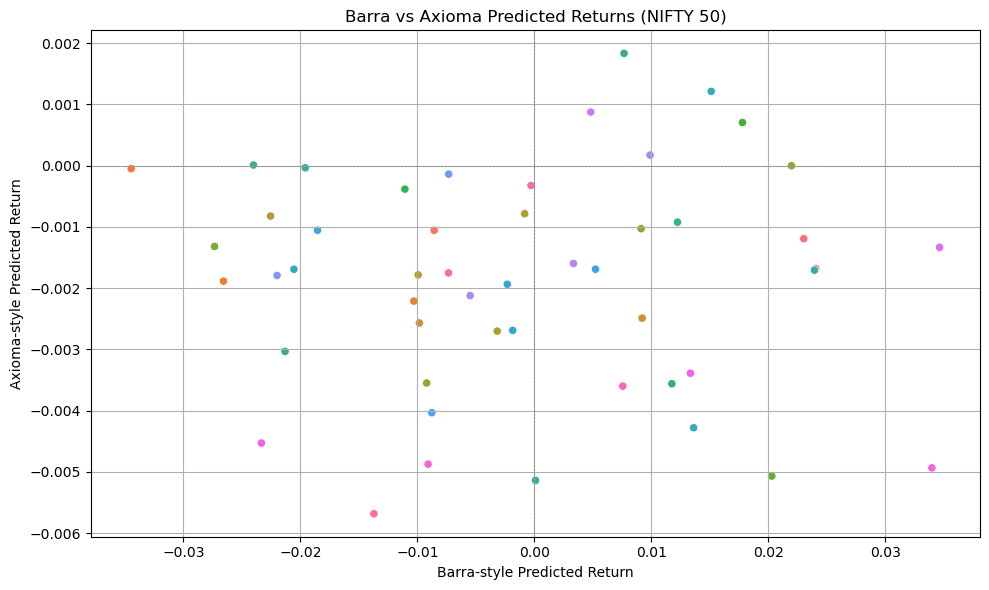

In [3]:
import pandas as pd
import numpy as np
import yfinance as yf
from datetime import datetime, timedelta
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Get Nifty 50 tickers from Wikipedia
nifty_url = "https://en.wikipedia.org/wiki/NIFTY_50"
nifty_table = pd.read_html(nifty_url, header=0)
nifty_stocks = nifty_table[1]
tickers = [ticker + ".NS" for ticker in nifty_stocks['Symbol'].tolist()]

# Step 2: Download last 90 days of adjusted closing prices
end = datetime.today()
start = end - timedelta(days=90)
data = yf.download(tickers, start=start.strftime('%Y-%m-%d'), end=end.strftime('%Y-%m-%d'))['Close']
data = data.dropna(axis=1)
returns = data.pct_change().dropna()

# Step 3: Barra-style simulated exposures (Value, Momentum, Size, Volatility)
np.random.seed(42)
n_factors = 4
barra_factors = ['Value', 'Momentum', 'Size', 'Volatility']
barra_exposures = pd.DataFrame(np.random.normal(0, 1, size=(returns.shape[1], n_factors)),
                               index=returns.columns, columns=barra_factors)
barra_factor_returns = pd.Series(np.random.normal(0, 0.01, size=n_factors), index=barra_factors)
barra_pred = barra_exposures @ barra_factor_returns

# Step 4: Axioma-style PCA-based statistical model
scaler = StandardScaler()
returns_std = scaler.fit_transform(returns)
pca = PCA(n_components=n_factors)
pca_factors = pca.fit_transform(returns_std)
pca_loadings = pd.DataFrame(pca.components_.T, index=returns.columns, columns=[f'PC{i+1}' for i in range(n_factors)])
pca_factor_returns = pd.Series(np.random.normal(0, 0.01, size=n_factors), index=pca_loadings.columns)
axioma_pred = pca_loadings @ pca_factor_returns

# Step 5: Compare predicted returns
comparison = pd.DataFrame({
    'Barra_Predicted': barra_pred,
    'Axioma_Predicted': axioma_pred
})

# Step 6: Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=comparison['Barra_Predicted'], y=comparison['Axioma_Predicted'], hue=comparison.index, legend=False)
plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.5)
plt.title('Barra vs Axioma Predicted Returns (NIFTY 50)')
plt.xlabel('Barra-style Predicted Return')
plt.ylabel('Axioma-style Predicted Return')
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\amitt\AppData\Local\Temp\ipykernel_38900\2167385083.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  price_data = yf.download(tickers, start=start.strftime('%Y-%m-%d'), end=end.strftime('%Y-%m-%d'))['Close']
[*********************100%***********************]  50 of 50 completed


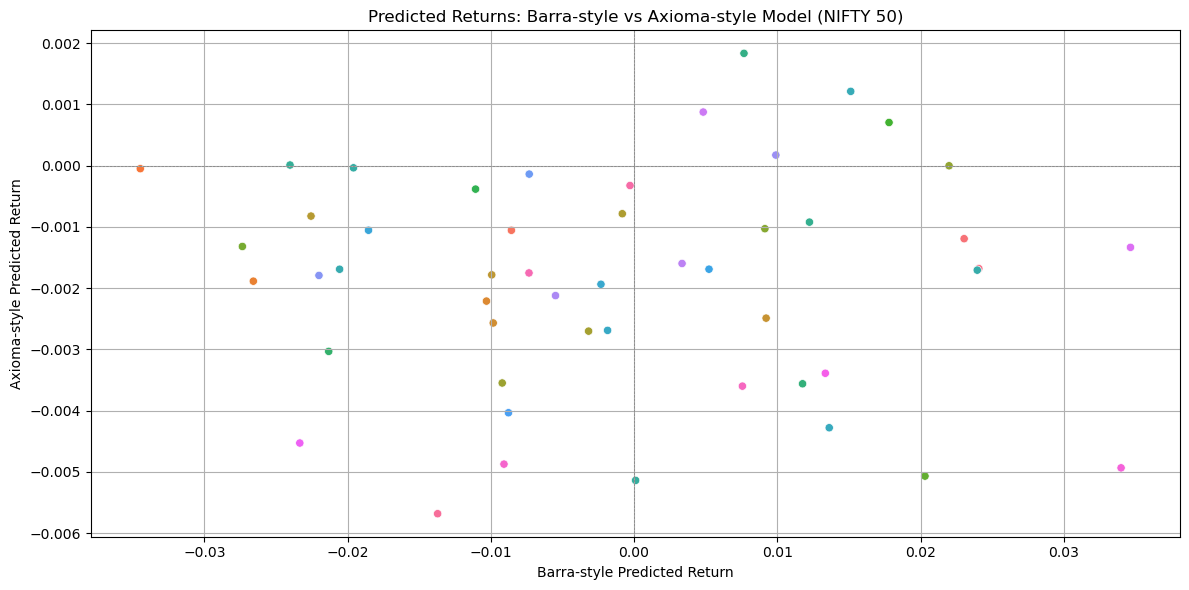


Top 10 Stocks with Highest Absolute Prediction Difference:
               Barra_Predicted  Axioma_Predicted  Difference
Ticker                                                      
TCS.NS                0.033997         -0.004934    0.038930
TATACONSUM.NS         0.034653         -0.001333    0.035986
ASIANPAINT.NS        -0.034471         -0.000048    0.034422
GRASIM.NS            -0.027343         -0.001319    0.026025
ADANIENT.NS           0.024066         -0.001680    0.025746
JIOFIN.NS             0.023957         -0.001705    0.025662
HCLTECH.NS            0.020308         -0.005069    0.025377
AXISBANK.NS          -0.026579         -0.001885    0.024693
ADANIPORTS.NS         0.023040         -0.001192    0.024232
INDUSINDBK.NS        -0.024019          0.000011    0.024030


In [7]:
import pandas as pd
import numpy as np
import yfinance as yf
from datetime import datetime, timedelta
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Get NIFTY 50 tickers from Wikipedia
nifty_url = "https://en.wikipedia.org/wiki/NIFTY_50"
nifty_table = pd.read_html(nifty_url, header=0)
nifty_stocks = nifty_table[1]  # 2nd table contains the tickers
tickers = [ticker + ".NS" for ticker in nifty_stocks['Symbol'].tolist()]

# Step 2: Download adjusted close prices from Yahoo Finance
end = datetime.today()
start = end - timedelta(days=90)
price_data = yf.download(tickers, start=start.strftime('%Y-%m-%d'), end=end.strftime('%Y-%m-%d'))['Close']
price_data = price_data.dropna(axis=1)  # drop stocks with incomplete data

# Step 3: Calculate daily returns
returns = price_data.pct_change().dropna()

# Step 4: Simulate Barra-style model (fundamental factors)
np.random.seed(42)
n_factors = 4
barra_factors = ['Value', 'Momentum', 'Size', 'Volatility']
barra_exposures = pd.DataFrame(np.random.normal(0, 1, size=(returns.shape[1], n_factors)),
                               index=returns.columns, columns=barra_factors)
barra_factor_returns = pd.Series(np.random.normal(0, 0.01, size=n_factors), index=barra_factors)
barra_predicted = barra_exposures @ barra_factor_returns

# Step 5: Axioma-style model (statistical PCA-based)
scaler = StandardScaler()
returns_scaled = scaler.fit_transform(returns)
pca = PCA(n_components=n_factors)
pca_factors = pca.fit_transform(returns_scaled)
pca_loadings = pd.DataFrame(pca.components_.T, index=returns.columns, columns=[f'PC{i+1}' for i in range(n_factors)])
pca_factor_returns = pd.Series(np.random.normal(0, 0.01, size=n_factors), index=pca_loadings.columns)
axioma_predicted = pca_loadings @ pca_factor_returns

# Step 6: Compare predictions
comparison = pd.DataFrame({
    'Barra_Predicted': barra_predicted,
    'Axioma_Predicted': axioma_predicted
}).sort_index()

# Step 7: Plot comparison
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Barra_Predicted', y='Axioma_Predicted', data=comparison, hue=comparison.index, legend=False)
plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.5)
plt.title('Predicted Returns: Barra-style vs Axioma-style Model (NIFTY 50)')
plt.xlabel('Barra-style Predicted Return')
plt.ylabel('Axioma-style Predicted Return')
plt.grid(True)
plt.tight_layout()
plt.show()

# Optional: print top differences
print("\nTop 10 Stocks with Highest Absolute Prediction Difference:")
comparison['Difference'] = (comparison['Barra_Predicted'] - comparison['Axioma_Predicted']).abs()
print(comparison.sort_values('Difference', ascending=False).head(10))


C:\Users\amitt\AppData\Local\Temp\ipykernel_38900\2112062614.py:18: FutureWarning: YF.download() has changed argument auto_adjust default to True
  prices = yf.download(tickers, start=start.strftime('%Y-%m-%d'),
[*********************100%***********************]  50 of 50 completed


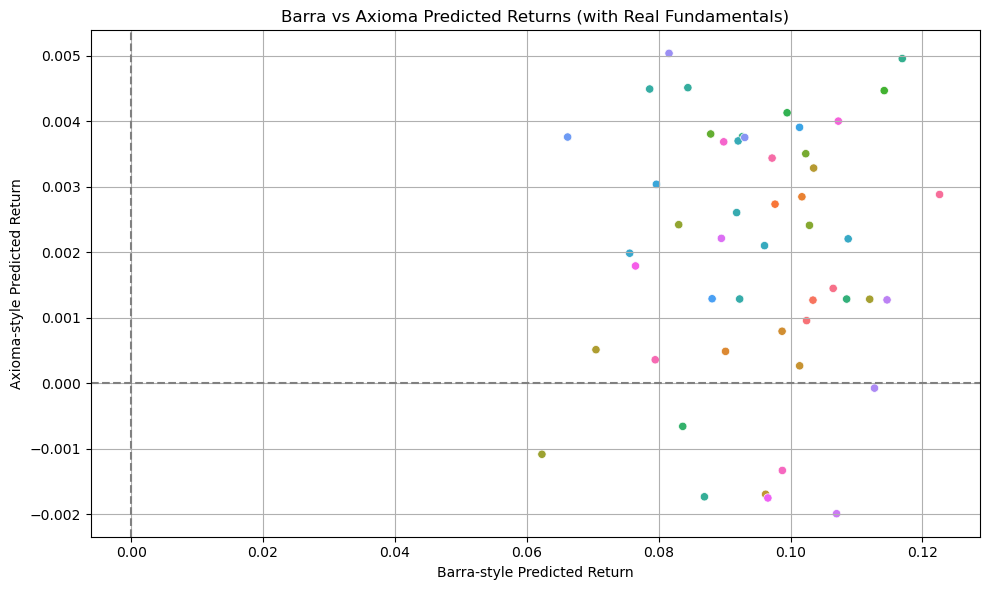


Top 10 stocks by prediction difference:
                  Barra    Axioma      Diff
WIPRO.NS       0.122609  0.002883  0.119725
SHRIRAMFIN.NS  0.114641  0.001273  0.113367
SBIN.NS        0.112737 -0.000074  0.112812
ICICIBANK.NS   0.116947  0.004959  0.111988
COALINDIA.NS   0.112011  0.001283  0.110728
HDFCBANK.NS    0.114212  0.004470  0.109743
SUNPHARMA.NS   0.106986 -0.001993  0.108979
HINDALCO.NS    0.108514  0.001286  0.107228
M&M.NS         0.108743  0.002205  0.106538
ADANIENT.NS    0.106470  0.001449  0.105021


In [11]:
import pandas as pd
import numpy as np
import yfinance as yf
from datetime import datetime, timedelta
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Fetch NIFTY 50 tickers from Wikipedia
nifty_url = "https://en.wikipedia.org/wiki/NIFTY_50"
nifty_table = pd.read_html(nifty_url, header=0)
tickers = [sym + ".NS" for sym in nifty_table[1]['Symbol'].tolist()]

# Step 2: Download Adj Close prices
end = datetime.today()
start = end - timedelta(days=90)
prices = yf.download(tickers, start=start.strftime('%Y-%m-%d'),
                     end=end.strftime('%Y-%m-%d'))['Close']
prices = prices.dropna(axis=1)  # filter out incomplete data

# Step 3: Calculate daily returns
returns = prices.pct_change().dropna()

# Step 4: Fetch fundamentals (market cap, P/E)
fund = {}
for tick in returns.columns:
    info = yf.Ticker(tick).info
    fund[tick] = {
        'marketCap': info.get('marketCap', np.nan),
        'trailingPE': info.get('trailingPE', np.nan)
    }
fund_df = pd.DataFrame(fund).T.dropna()
# Keep only stocks with both marketCap and trailingPE
filtered = fund_df.index.intersection(returns.columns)
fund_df = fund_df.loc[filtered]
returns = returns[filtered]

# Step 5: Define "Size" and "Value" exposures
# Size = log market cap, Value = inverse trailing P/E
exposures = pd.DataFrame(index=filtered)
exposures['Size'] = np.log(fund_df['marketCap'])
exposures['Value'] = 1 / fund_df['trailingPE']
# Add two random factors to match simulated model dim
exposures['Momentum'] = np.random.normal(0,1,len(filtered))
exposures['Volatility'] = np.random.normal(0,1,len(filtered))
barra_factor_returns = pd.Series(np.random.normal(0,0.01,4), 
                                 index=['Value','Momentum','Size','Volatility'])

barra_pred = exposures[['Value','Momentum','Size','Volatility']] @ barra_factor_returns

# Step 6: Axioma-style PCA model
scaler = StandardScaler()
ret_std = scaler.fit_transform(returns)

# Fit PCA
pca = PCA(n_components=4)
pca_factors = pca.fit_transform(ret_std)

# Extract loadings
pca_loadings = pd.DataFrame(pca.components_.T, index=returns.columns, 
                            columns=[f'PC{i+1}' for i in range(4)])

# Simulate factor returns
pca_fr = pd.Series(np.random.normal(0, 0.01, 4), index=pca_loadings.columns)

# Predicted returns from Axioma-style (statistical) model
axioma_pred = pca_loadings @ pca_fr

# Step 7: Compare & Plot
comp = pd.DataFrame({
    'Barra': barra_pred,
    'Axioma': axioma_pred
})
plt.figure(figsize=(10,6))
sns.scatterplot(x='Barra', y='Axioma', data=comp, hue=comp.index, legend=False)
plt.axhline(0, linestyle='--', color='gray')
plt.axvline(0, linestyle='--', color='gray')
plt.title('Barra vs Axioma Predicted Returns (with Real Fundamentals)')
plt.xlabel('Barra-style Predicted Return')
plt.ylabel('Axioma-style Predicted Return')
plt.grid(True)
plt.tight_layout()
plt.show()

# Step 8: Highlight largest prediction differences
comp['Diff'] = (comp['Barra'] - comp['Axioma']).abs()
print("\nTop 10 stocks by prediction difference:")
print(comp.sort_values('Diff', ascending=False).head(10))
